In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df = pd.concat([df_train, df_test], axis=0)

In [123]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [124]:
df.shape

(2919, 81)

In [125]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

##### Data Cleaning

In [126]:
total_missing = df.isnull().sum().sort_values(ascending = False)
total_missing

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
HeatingQC          0
Length: 81, dtype: int64

In [127]:
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
percent_missing

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
                  ...   
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
HeatingQC       0.000000
Length: 81, dtype: float64

In [128]:
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total Missing', 'Percent Missing'])
missing_data.head(25)

,Total Missing,Percent Missing
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


In [129]:
# drop_features = missing_data[missing_data['Percent Missing'] > 0.2]
# drop_features.index
drop_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [130]:
df = df.drop(drop_features, axis=1)
df.shape

(2919, 76)

In [131]:
df.describe(include = 'object').T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511
Condition2,2919,8,Norm,2889


In [132]:
empty_features = []

for col in df.columns:
    if df[col].isnull().nunique() == 2:
        empty_features.append(col)
        
empty_features = [x for x in empty_features if x not in drop_features]
empty_features.remove('SalePrice')
empty_features

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [133]:
removed_features = []

for feature in empty_features:
    if df[feature].isnull().sum() <= 5:
        df[feature] = df[feature].fillna(value=df[feature].mode()[0])
        removed_features.append(feature)

In [134]:
empty_features = [x for x in empty_features if x not in removed_features]
df[empty_features].isnull().sum()

LotFrontage     486
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

<AxesSubplot:>

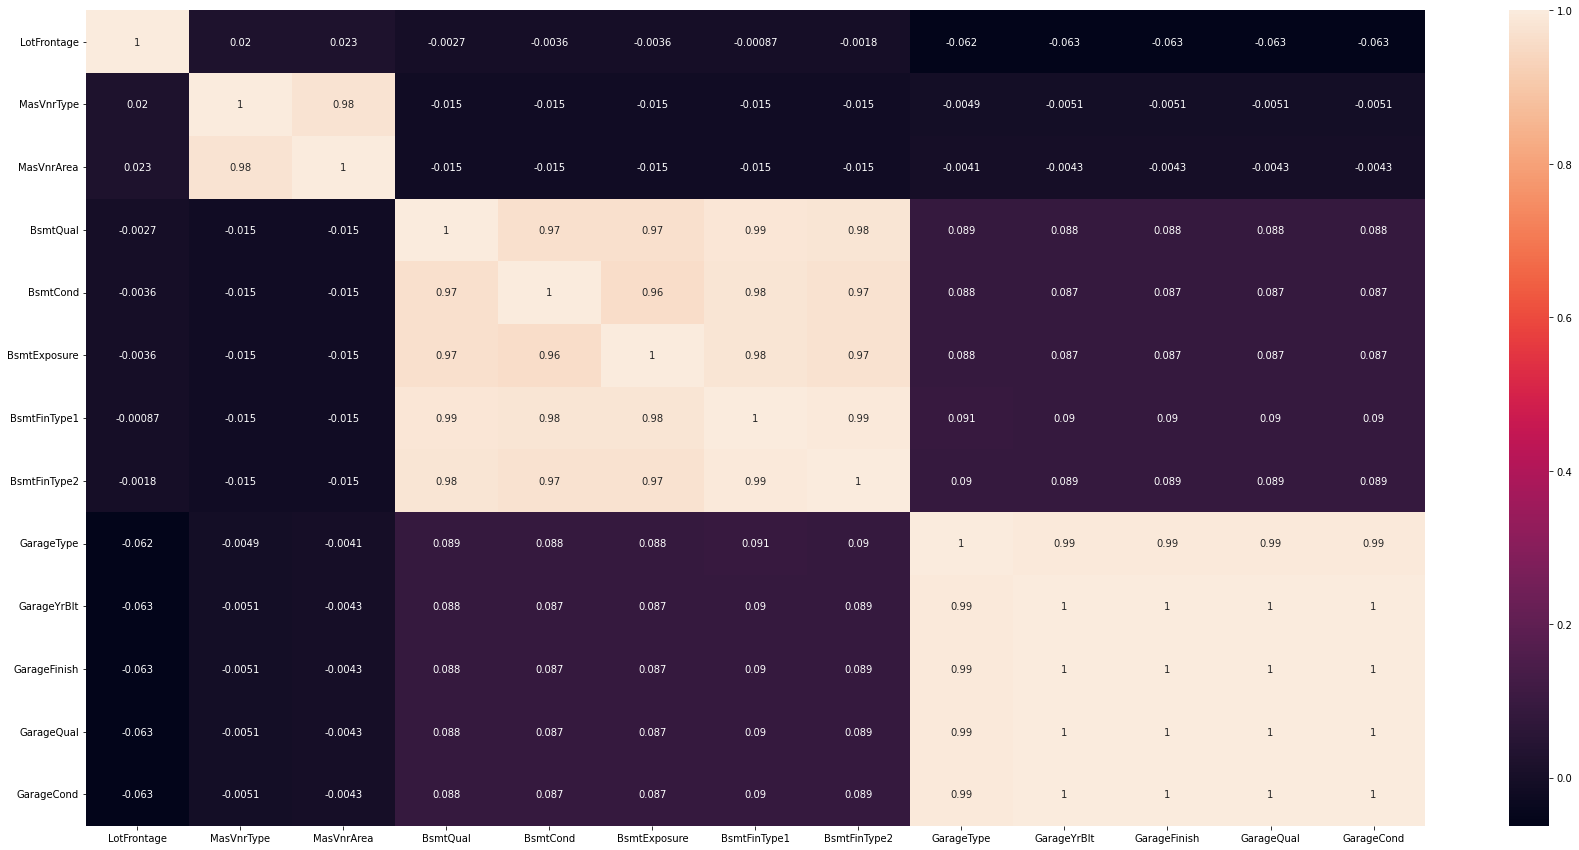

In [135]:
plt.figure(figsize=(30,15))
sns.heatmap(df[empty_features].isnull().corr(), annot=True)

In [136]:
df['LotFrontage'] = df['LotFrontage'].fillna(value=df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0)
to_none = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in to_none:
    df[feature] = df[feature].fillna(value='None')

In [137]:
df.shape

(2919, 76)

<AxesSubplot:>

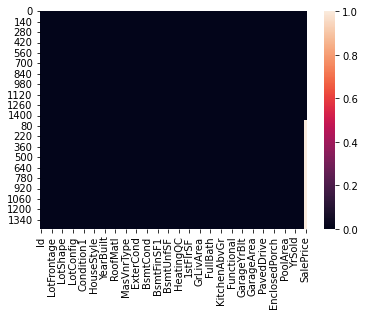

In [138]:
sns.heatmap(df.isnull())

In [139]:
df.drop('SalePrice', axis=1).isnull().sum().sum()

0

In [140]:
df['LogSalePrice'] = df['SalePrice'].map(lambda x : math.log(x))

pd.Series({
    'LogPriceSkew' : df.LogSalePrice.skew(),
    'SalePrice' : df.SalePrice.skew()
})

LogPriceSkew    0.121335
SalePrice       1.882876
dtype: float64

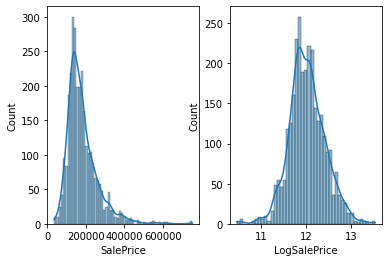

In [141]:
fig, ax = plt.subplots(1,2)
sns.histplot(x='SalePrice', data=df, kde=True, ax=ax[0])
sns.histplot(x='LogSalePrice', data=df, kde=True, ax=ax[1]);

In [142]:
ordinal_cols= list(df.columns[df.columns.str.contains('Yr|Year')])
print('ordinal/temporal columns:\n',ordinal_cols)
nominal_cols= list(set(df.select_dtypes(include=['object']).columns) - set(ordinal_cols))
print('nominal columns:\n', nominal_cols)
numeric_cols= list(set(df.select_dtypes(exclude=['object']).columns) - set(ordinal_cols))
print('numeric columns:\n',numeric_cols)

ordinal/temporal columns:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
nominal columns:
 ['HouseStyle', 'Condition1', 'GarageCond', 'Electrical', 'BsmtExposure', 'MasVnrType', 'GarageQual', 'Neighborhood', 'Utilities', 'SaleCondition', 'Street', 'LotConfig', 'BsmtCond', 'SaleType', 'Exterior1st', 'KitchenQual', 'RoofMatl', 'CentralAir', 'LotShape', 'Heating', 'ExterCond', 'Foundation', 'ExterQual', 'GarageFinish', 'BldgType', 'GarageType', 'MSZoning', 'Functional', 'Exterior2nd', 'RoofStyle', 'BsmtFinType2', 'LandContour', 'HeatingQC', 'Condition2', 'LandSlope', 'BsmtFinType1', 'PavedDrive', 'BsmtQual']
numeric columns:
 ['OverallCond', 'Fireplaces', 'OpenPorchSF', 'LogSalePrice', 'HalfBath', 'BedroomAbvGr', 'MasVnrArea', 'LowQualFinSF', 'BsmtFinSF2', '2ndFlrSF', 'LotArea', 'MSSubClass', '3SsnPorch', 'PoolArea', 'BsmtFullBath', 'GarageArea', 'MoSold', 'BsmtFinSF1', 'FullBath', 'SalePrice', 'BsmtHalfBath', 'EnclosedPorch', 'WoodDeckSF', 'MiscVal', 'LotFrontage', 'OverallQual'

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='LogSalePrice'>

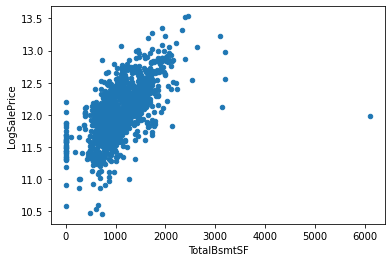

In [143]:
# Bivariate
var = 'TotalBsmtSF'
biv_data = pd.concat([df['LogSalePrice'], df[var]], axis=1)
biv_data.plot.scatter(x=var, y='LogSalePrice')

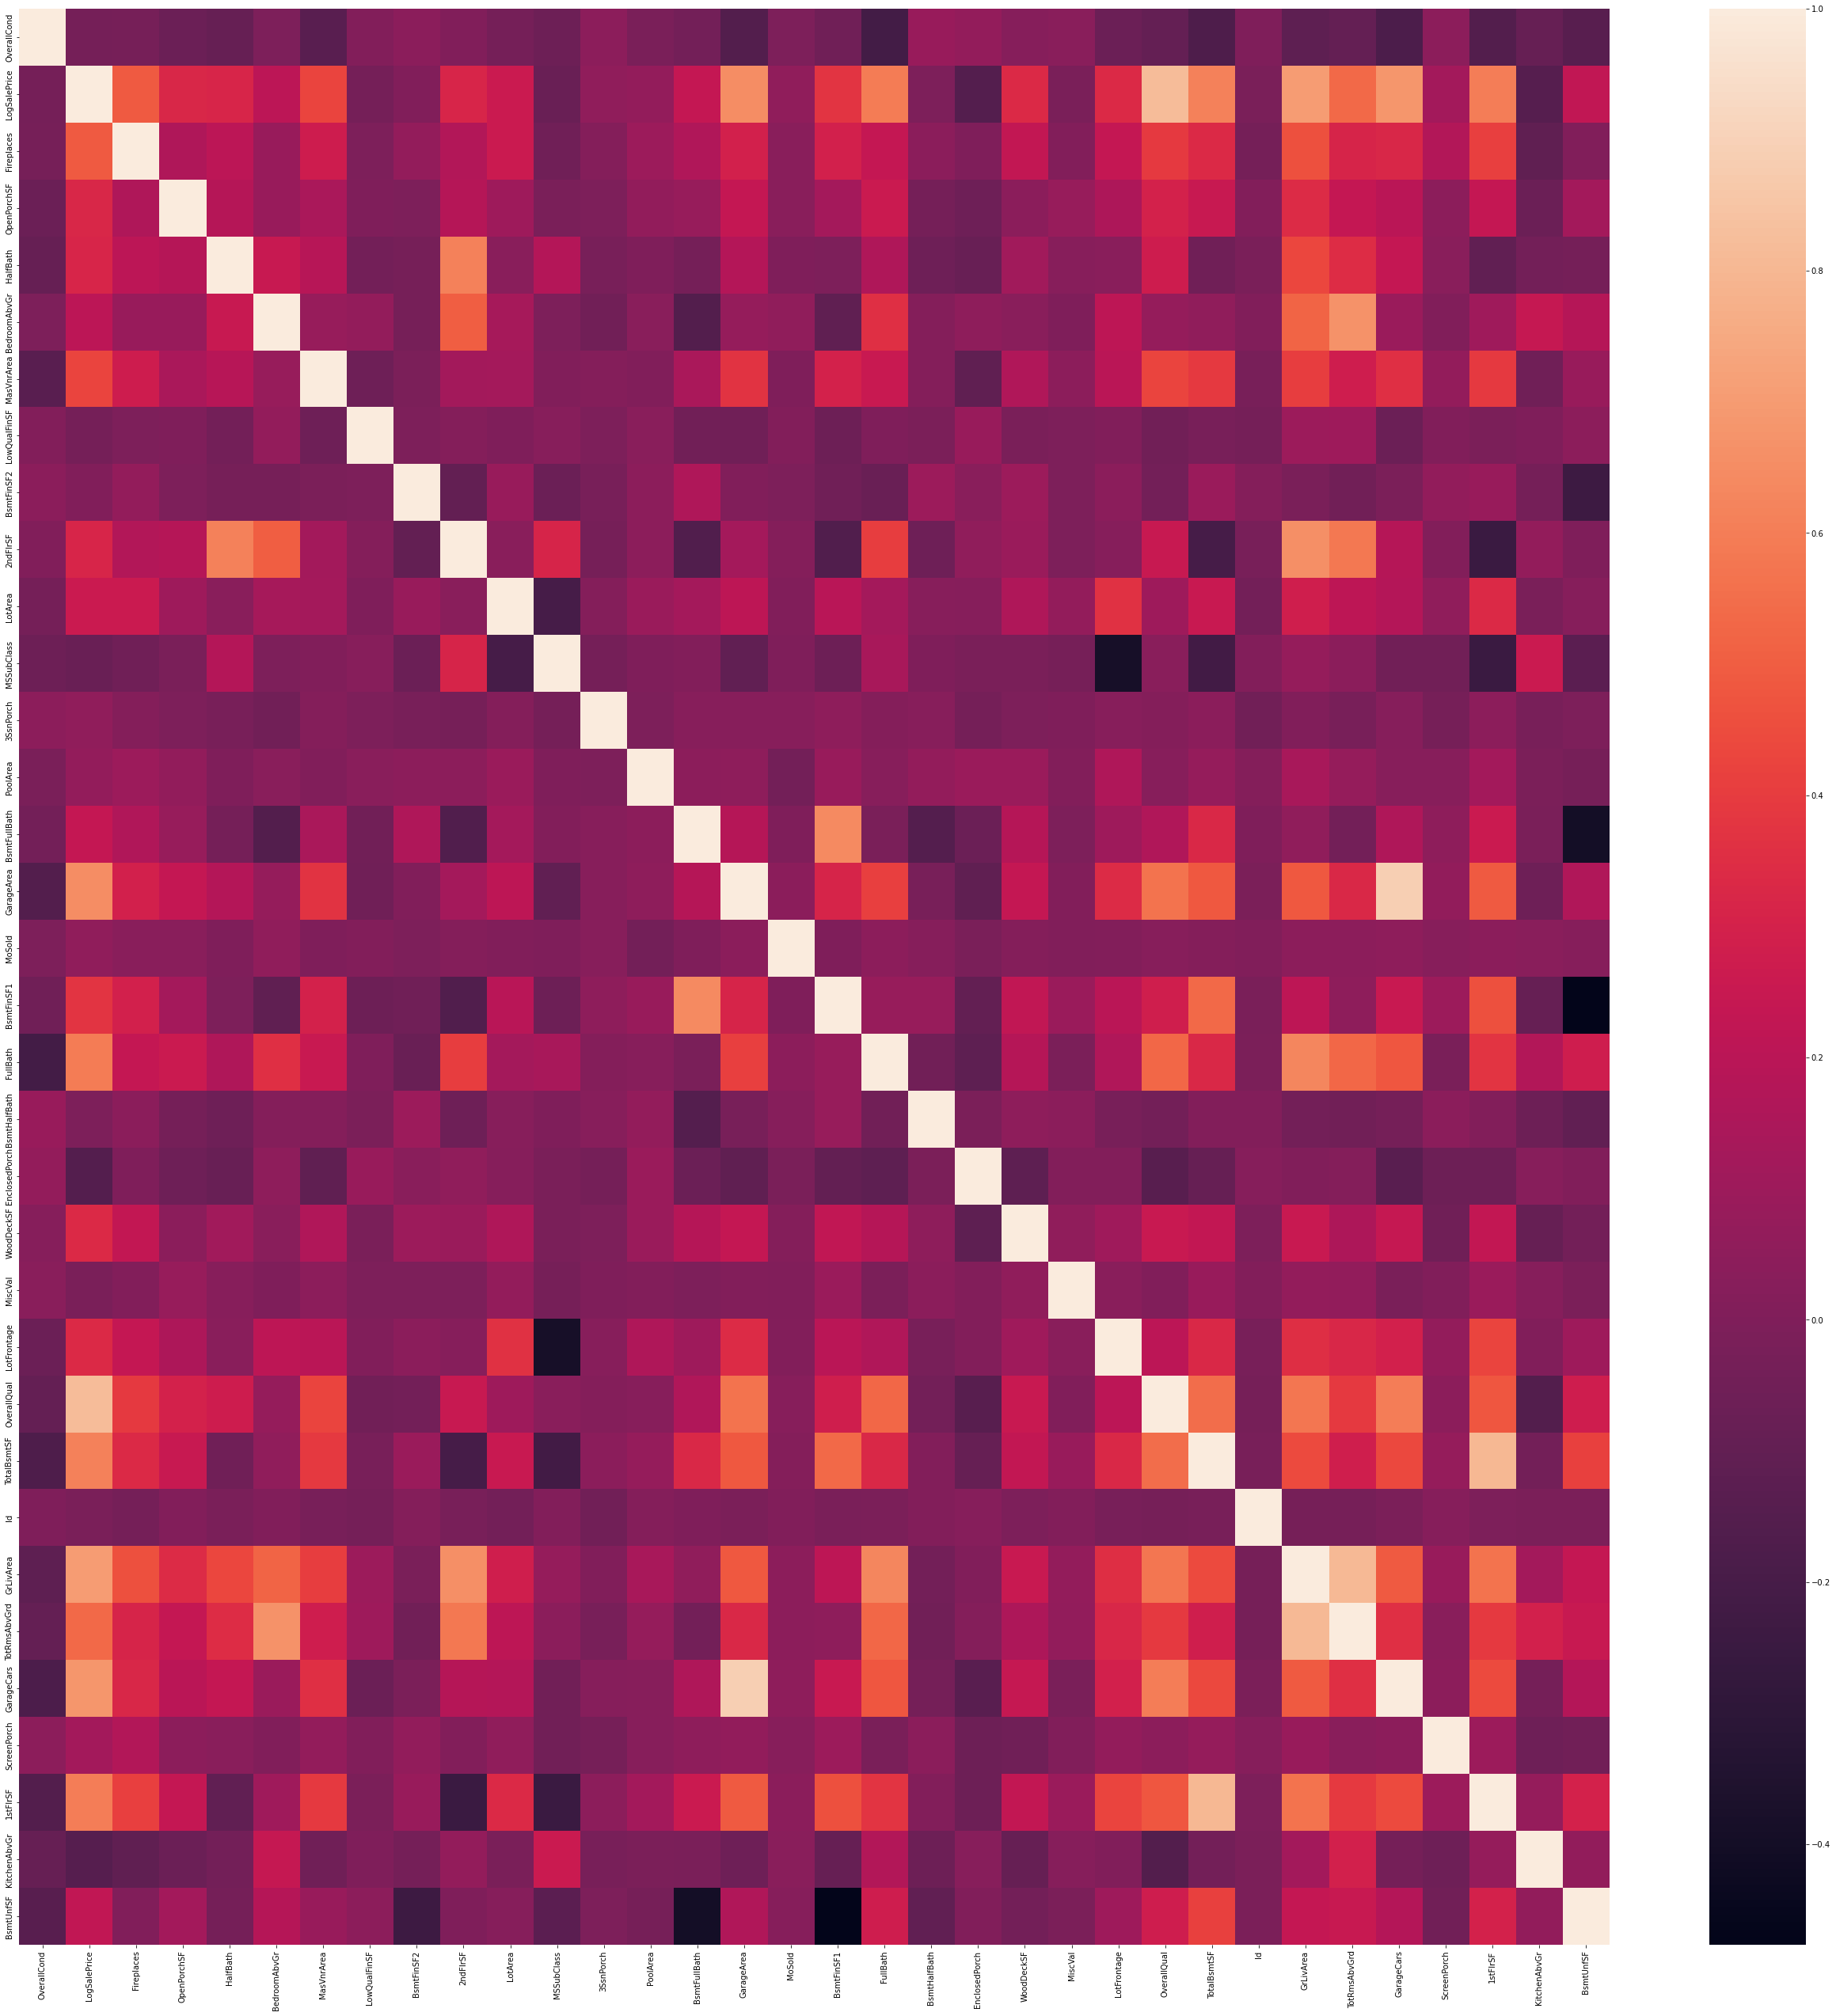

In [144]:
plt.figure(figsize=(45,45))
sns.heatmap(df[list(set(numeric_cols)-{'SalePrice'})].corr())
plt.show()

In [145]:
nominal_df = pd.DataFrame()
for nominal_col in nominal_cols:
    categories = df[nominal_col].unique()
    averages = dict()
    for category in categories:
        averages[category] = df[df[nominal_col] == category]['LogSalePrice'].mean()

    averages = dict(sorted(averages.items(), key=lambda item: item[1]))

    i = 0
    for average in averages.keys():
        averages[average] = i
        i+=1

    nominal_df = pd.concat([nominal_df, df[nominal_col].replace(averages)], axis=1)

nominal_df = pd.concat([nominal_df, df['LogSalePrice']], axis=1)
nominal_df.corr()['LogSalePrice']

HouseStyle       0.314998
Condition1       0.193701
GarageCond       0.377612
Electrical       0.300825
BsmtExposure     0.357421
MasVnrType       0.430322
GarageQual       0.358360
Neighborhood     0.742641
Utilities        0.012632
SaleCondition    0.270023
Street           0.057369
LotConfig        0.145078
BsmtCond         0.285214
SaleType         0.342225
Exterior1st      0.413927
KitchenQual      0.667893
RoofMatl         0.130646
CentralAir       0.351600
LotShape         0.281623
Heating          0.179754
ExterCond        0.178841
Foundation       0.550411
ExterQual        0.678840
GarageFinish     0.604878
BldgType         0.175402
GarageType       0.575628
MSZoning         0.410575
Functional       0.138038
Exterior2nd      0.402828
RoofStyle        0.205915
BsmtFinType2     0.182484
LandContour      0.154134
HeatingQC        0.473762
Condition2       0.108098
LandSlope        0.038526
BsmtFinType1     0.396688
PavedDrive       0.304688
BsmtQual         0.647718
LogSalePrice

In [146]:
final_df = pd.concat([df.drop(nominal_cols, axis=1), nominal_df.drop('LogSalePrice', axis=1)], axis=1)
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Exterior2nd,RoofStyle,BsmtFinType2,LandContour,HeatingQC,Condition2,LandSlope,BsmtFinType1,PavedDrive,BsmtQual
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,13,1,5,1,4,4,0,6,2,3
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,6,1,5,1,4,4,0,4,2,3
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,13,1,5,1,4,4,0,6,2,3
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,7,1,5,1,3,4,0,4,2,2
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,13,1,5,1,4,4,0,6,2,3


In [147]:
final_df.drop('SalePrice', axis=1).corr()['LogSalePrice']

Id             -0.017942
MSSubClass     -0.073959
LotFrontage     0.335555
LotArea         0.257320
OverallQual     0.817184
                  ...   
Condition2      0.108098
LandSlope       0.038526
BsmtFinType1    0.396688
PavedDrive      0.304688
BsmtQual        0.647718
Name: LogSalePrice, Length: 76, dtype: float64

In [148]:
def get_results(actual, predictions):
    res_df = pd.DataFrame([(x[0], x[1]) for x in zip(actual, predictions)], columns=['LogActual', 'LogPredicted']).sort_values(by='LogActual').reset_index().drop('index', axis=1).rename_axis('index')
    res_df['LogResiduals'] = res_df['LogActual'] - res_df['LogPredicted']

    res_df['Actual'] = res_df['LogActual'].map(lambda x : math.exp(x))
    res_df['Predicted'] = res_df['LogPredicted'].map(lambda x : math.exp(x))
    res_df['Residuals'] = res_df['Actual'] - res_df['Predicted']
    return res_df

def get_metrics(actual, predicted):
    residuals = actual - predicted
    return pd.Series({
        'MSE' : sum(residuals**2) / len(actual),
        'RMSE' : math.sqrt(sum(residuals**2) / len(actual)),
        'MAPE' : 100 * sum(abs(residuals / actual)) / len(actual),
        'MPE' : 100 * sum(residuals / actual) / len(actual),
        'R2' : r2_score(actual, predicted)
    })

In [149]:
def split_dataframe(df):
    return (
        df.iloc[:1460],
        df.iloc[1460:]
    )

X_features = df.drop(['SalePrice', 'LogSalePrice'], axis=1).columns
y_features = 'LogSalePrice'

final_train_val, final_test = split_dataframe(final_df)

# Set the validation set to be 0.07, which is 100 of the training values
X_train_val, y_train_val = final_train_val[X_features].values, final_train_val[y_features].values
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.07, random_state=42)
X_test = final_test[X_features].values

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape

((1357, 75), (103, 75), (1459, 75), (1357,), (103,))

In [150]:
gra_model = GradientBoostingRegressor(random_state=42, n_estimators=200)
gra_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [151]:
gra_predictions = gra_model.predict(X_val)

In [152]:
gra_results = get_results(y_val, gra_predictions)
gra_metrics = get_metrics(gra_results.LogActual, gra_results.LogPredicted)
print(gra_metrics)

MSE     0.011754
RMSE    0.108414
MAPE    0.622953
MPE     0.125952
R2      0.930338
dtype: float64


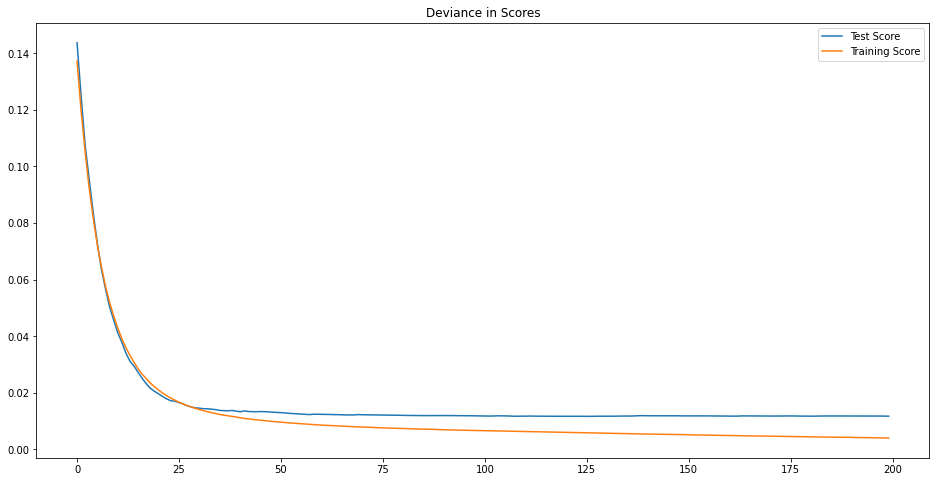

In [153]:
test_score = []
for i, pred in enumerate(gra_model.staged_predict(X_val)):
    test_score.append(gra_model.loss_(y_val, pred))

n_estimators = np.arange(len(test_score))

plt.figure(figsize=(16,8))
plt.title('Deviance in Scores')
plt.plot(n_estimators, test_score, label='Test Score')
plt.plot(n_estimators, gra_model.train_score_, label='Training Score')
plt.legend();

In [154]:
grad_model_submission = GradientBoostingRegressor().fit(X_train_val, y_train_val)
grad_predictions_submission = grad_model_submission.predict(X_test)
grad_predictions_submission = [math.exp(x) for x in grad_predictions_submission]

df_predictions = pd.DataFrame([(x,y) for x,y in zip(df_test.index, grad_predictions_submission)]).set_axis(['Id', 'SalePrice'], axis='columns').set_index('Id')
df_predictions.to_csv('submission.csv')